In [ ]:
# import dataset file and library 
import pandas as pd 
import matplotlib.pyplot as plt 
from math import * 
import seaborn as sns 
coffesales = pd.read_csv('Coffe_sales.csv')
coffesales

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Coffesales Information**

In [2]:
coffesales.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [3]:
coffesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


**the top3 of best coffee_sales**

In [4]:
top3_best_coffee_sales = coffesales.groupby("coffee_name")["money"].sum().sort_values(ascending=False)
top3_best_coffee_sales.head(3)

coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Name: money, dtype: float64

The best coffee_sales per Month 


In [5]:
#Creating a pivot table

Coffee_sales_permonth=pd.pivot_table(coffesales,values='money',index='coffee_name',columns='Month_name',aggfunc='sum').round(0)
Coffee_sales_permonth

Month_name,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
coffee_name,,,,,,,,,,,,
Americano,942.0,852.0,701.0,3037.0,649.0,858.0,391.0,3573.0,1117.0,649.0,1142.0,740.0
Americano with Milk,1268.0,2010.0,1759.0,2623.0,1605.0,1864.0,2166.0,2619.0,1772.0,1605.0,2531.0,2930.0
Cappuccino,1381.0,1116.0,1359.0,1860.0,966.0,1080.0,1735.0,2118.0,1961.0,930.0,1573.0,1360.0
Cocoa,154.0,361.0,751.0,2003.0,501.0,300.0,151.0,1305.0,302.0,1252.0,1144.0,298.0
Cortado,458.0,921.0,805.0,260.0,571.0,322.0,530.0,861.0,475.0,337.0,883.0,961.0
Espresso,96.0,254.0,253.0,358.0,105.0,273.0,230.0,427.0,161.0,63.0,253.0,217.0
Hot Chocolate,386.0,197.0,930.0,1144.0,536.0,361.0,528.0,1596.0,490.0,1323.0,2074.0,367.0
Latte,1034.0,1904.0,1681.0,1931.0,1466.0,1858.0,1886.0,3393.0,1886.0,2432.0,4291.0,3114.0


In [6]:
# creating associate Dataframe 
Coffee_sales_permonth.columns.tolist()
Coffee_sales_permonth.idxmax()
Coffee_sales_permonth.max()
monthbestsalecoffee=pd.DataFrame({"best_month": Coffee_sales_permonth.idxmax(),"bestsale":Coffee_sales_permonth.max()})
monthbestsalecoffee

,best_month,bestsale
Month_name,,
Apr,Cappuccino,1381.0
Aug,Americano with Milk,2010.0
Dec,Americano with Milk,1759.0
Feb,Americano,3037.0
Jan,Americano with Milk,1605.0
Jul,Americano with Milk,1864.0
Jun,Americano with Milk,2166.0
Mar,Americano,3573.0
May,Cappuccino,1961.0


**Month by high value sales**

<Axes: xlabel='Month_name'>

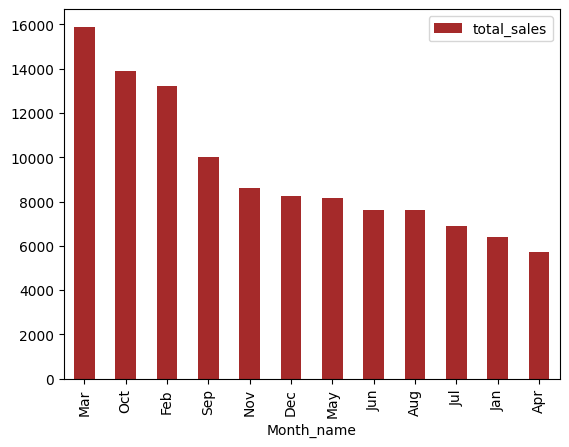

In [7]:
money_per_month= coffesales.groupby("Month_name")["money"].sum().sort_values(ascending=False)
money_per_month= money_per_month.reset_index(name='total_sales')
money_per_month.plot(x='Month_name',kind='bar',color='brown')